# 서울시 확진자 현황

In [2]:
import pandas as pd
import numpy as np

In [149]:
seoul = pd.read_csv('./source/서울시 코로나19 확진자 현황.csv', sep=',',encoding='euc-kr')
seoul.head(3)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


# 날짜 Datetime 객체로 바꾸기
## 알아서 대소가 정해지기 때문에 전처리하기 쉬움

In [150]:
seoul['확진일'].unique()[:10]

array(['11.30.', '11.29.', '11.28.', '11.27.', '11.26.', '11.25.',
       '11.24.', '11.23.', '11.22.', '11.21.'], dtype=object)

In [151]:
seoul['확진일'] = seoul.apply(lambda r: '-'.join(r['확진일'][:-1].split('.')), axis=1)

In [152]:
from dateutil.parser import parse
from datetime import datetime
seoul['확진일'] = seoul.apply(lambda r: parse(r['확진일']).date(), axis=1)

In [153]:
seoul['확진일']

0       2020-11-30
1       2020-11-30
2       2020-11-30
3       2020-11-30
4       2020-11-30
           ...    
8961    2020-01-31
8962    2020-01-30
8963    2020-01-30
8964    2020-01-30
8965    2020-01-24
Name: 확진일, Length: 8966, dtype: object

In [154]:
seoul = seoul[seoul['지역']!='타시도']
seoul = seoul[seoul['지역']!='기타']
seoul = seoul[seoul['지역']!='경기도']

In [155]:
seoul.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

## 환자번호, 국적, 환자정보, 조치사항 열은 모두 NaN값

In [156]:
seoul.count()

연번      8299
확진일     8299
환자번호       0
국적         0
환자정보       0
지역      8299
여행력      482
접촉력     8299
조치사항       0
상태      6228
이동경로    6568
등록일     8299
수정일     8299
노출여부    8299
dtype: int64

In [157]:
seoul.isnull().sum()

연번         0
확진일        0
환자번호    8299
국적      8299
환자정보    8299
지역         0
여행력     7817
접촉력        0
조치사항    8299
상태      2071
이동경로    1731
등록일        0
수정일        0
노출여부       0
dtype: int64

In [158]:
del seoul['환자번호']
del seoul['국적']
del seoul['환자정보']
del seoul['조치사항']

In [159]:
seoul.head(3)

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부
0,8966,2020-11-30,강북구,NaN,감염경로 조사중,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,2020-11-30,영등포구,NaN,서초구 사우나 관련,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,2020-11-30,영등포구,NaN,감염경로 조사중,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


## 구별/날짜별 확진자 수

In [161]:
len(seoul['지역'].str.strip())

8299

In [231]:
district = pd.pivot_table(data=seoul,
                          index='지역',
                          columns= '확진일',
                          values='연번',
                          aggfunc='count')
district = district.fillna(0)
district = district.astype(int)
district['구별 총계'] = district.apply(sum, axis=1)
district.head()         

확진일,2020-01-24,2020-01-30,2020-01-31,2020-02-05,2020-02-06,2020-02-16,2020-02-19,2020-02-20,2020-02-21,2020-02-22,...,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,구별 총계
지역,,,,,,,,,,,,,,,,,,,,,
강남구,0,0,0,0,0,0,0,1,0,0,...,5,17,14,11,5,8,6,12,12,520
강동구,0,0,0,0,0,0,0,0,0,1,...,4,5,4,5,2,3,5,2,5,277
강북구,0,0,0,0,0,0,0,0,0,0,...,1,0,4,5,1,1,2,8,4,200
강서구,1,0,0,0,0,0,0,0,0,0,...,4,6,9,58,56,23,15,15,15,604
관악구,0,0,0,0,0,0,0,0,0,0,...,1,2,4,1,8,9,3,7,7,547


# 시각화

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [15, 15]

font1 = {'family': 'Malgun Gothic', 'size': 24, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 20, 'weight': 'bold',
         'color':  'blue'}
font3 = {'family': 'Malgun Gothic', 'size': 18, 
         'color':  'Green'}

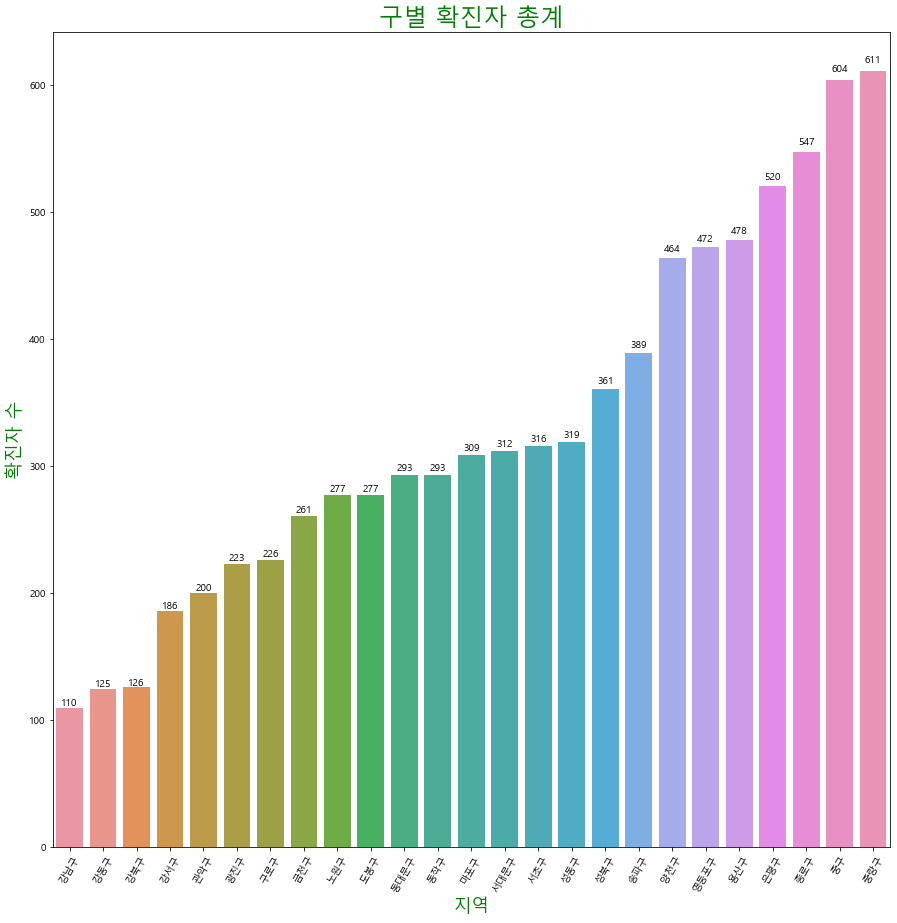

In [233]:
district_sort = district.sort_values(by='구별 총계',ascending=True)

ax = sns.barplot(data=district_sort,
                x=district.index,
                y='구별 총계')

# 바 위에 숫자 그리기. 그대로 가져오면 됨
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(int(p.get_height()), (left+width/2, height*1.01), ha='center')

plt.title('구별 확진자 총계', fontdict=font1)
plt.xlabel('지역', fontdict=font3)
plt.ylabel('확진자 수', fontdict=font3)
plt.xticks(rotation=60)
plt.show()

## 월별 총계

In [249]:
datesum = district.iloc[:,:-1].T
datesum['일별 총계'] = datesum.iloc[:,:-1].apply(sum, axis=1)

In [254]:
datesum = datesum[['일별 총계']]
datesum.reset_index(inplace=True)

- datetime 객체에서 월 가져오기

In [261]:
datesum['확진일'][0].month

1

In [263]:
datesum['월'] = datesum.apply(lambda r:r['확진일'].month, axis=1)
datesum.head()

지역,확진일,일별 총계,월
0,2020-01-24,1,1
1,2020-01-30,2,1
2,2020-01-31,3,1
3,2020-02-05,2,2
4,2020-02-06,1,2


In [266]:
monthsum = pd.pivot_table(data=datesum,
                          index='월',
                          values='일별 총계',
                          aggfunc='sum')
monthsum.rename(columns={
    '일별 총계':'월별 총계'
},inplace=True)                  
monthsum.head()                         

지역,월별 총계
월,
1,6
2,73
3,357
4,140
5,213


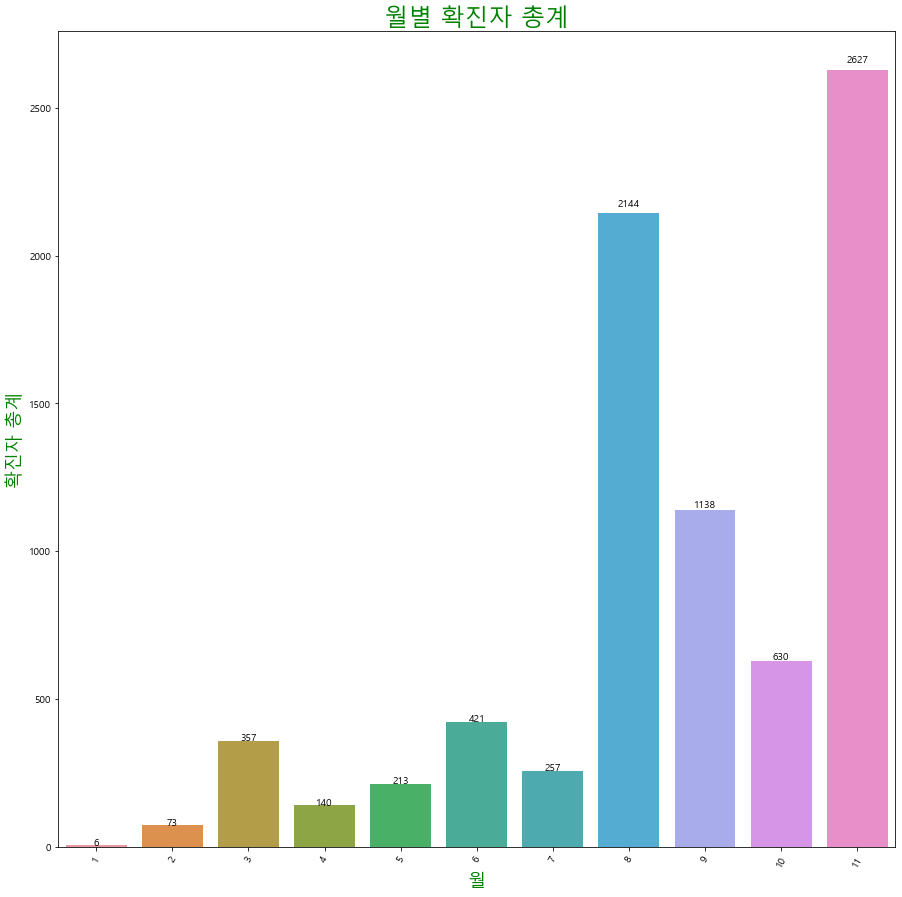

In [269]:
ax = sns.barplot(data=monthsum,
                x= monthsum.index,
                y= '월별 총계')

# 바 위에 숫자 그리기. 그대로 가져오면 됨
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(int(p.get_height()), (left+width/2, height*1.01), ha='center')

plt.title('월별 확진자 총계', fontdict=font1)
plt.xlabel('월', fontdict=font3)
plt.ylabel('확진자 총계', fontdict=font3)
plt.xticks(rotation=60)
plt.show()

## Datetime객체에서 주(ex. wk23) 가져오기

In [291]:
datesum['확진일'][0].isocalendar()[1]

4

In [292]:
datesum['주'] = datesum.apply(lambda r:r['확진일'].isocalendar()[1], axis=1)
datesum.head()

지역,확진일,일별 총계,월,주
0,2020-01-24,1,1,4
1,2020-01-30,2,1,5
2,2020-01-31,3,1,5
3,2020-02-05,2,2,6
4,2020-02-06,1,2,6


In [297]:
weeksum = pd.pivot_table(data=datesum,
                          index='주',
                          values='일별 총계',
                          aggfunc='sum')
weeksum.rename(columns={
    '일별 총계':'주별 총계'
},inplace=True)                  
weeksum.head()                         

지역,주별 총계
주,
4,1
5,5
6,3
7,2
8,17


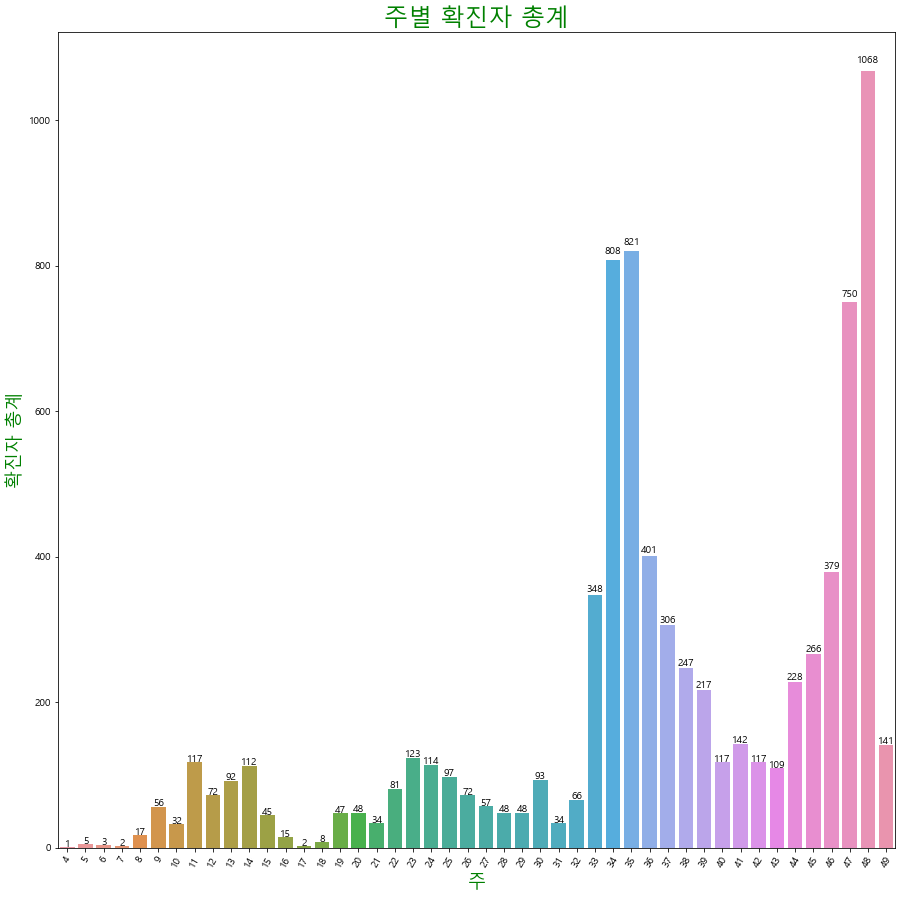

In [299]:
ax = sns.barplot(data=weeksum,
                x= weeksum.index,
                y= '주별 총계')

# 바 위에 숫자 그리기. 그대로 가져오면 됨
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(int(p.get_height()), (left+width/2, height*1.01), ha='center')

plt.title('주별 확진자 총계', fontdict=font1)
plt.xlabel('주', fontdict=font3)
plt.ylabel('확진자 총계', fontdict=font3)
plt.xticks(rotation=60)
plt.show()

In [221]:
top5date = district.iloc[:5,:].sort_values(by='총계',ascending=False).T
top5date = top5date.iloc[:-1,:]
top5date.head(3)

지역,강서구,관악구,강남구,강동구,강북구
확진일,,,,,
2020-01-24,1,0,0,0,0
2020-01-30,0,0,0,0,0
2020-01-31,0,0,0,0,0


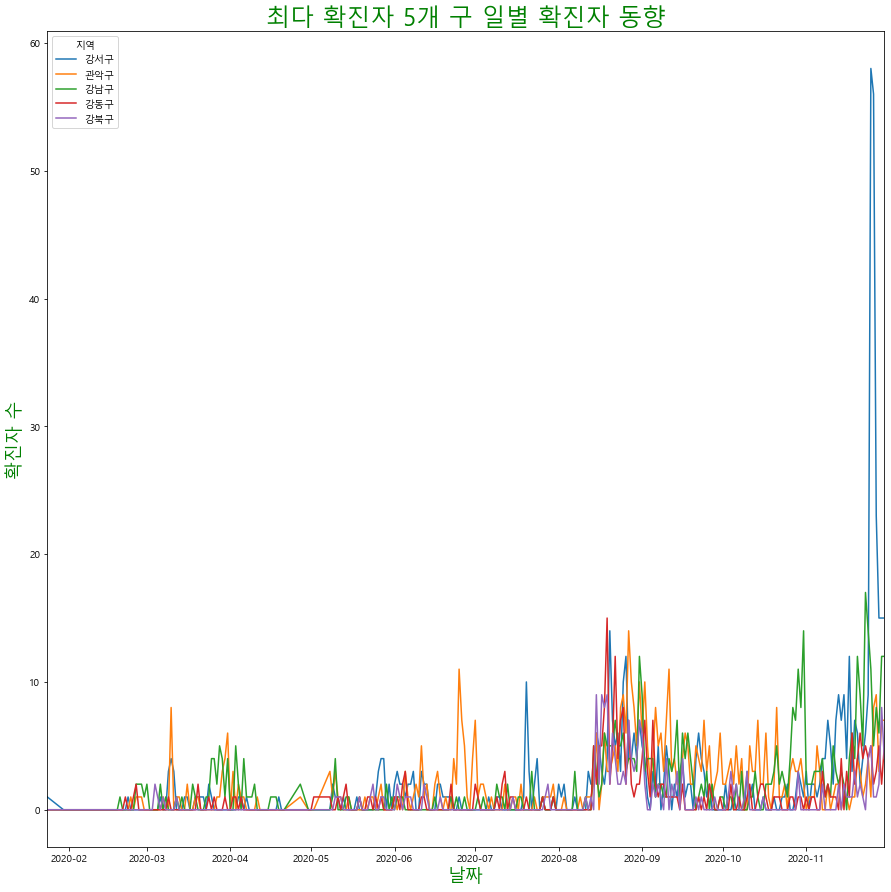

In [209]:
top5date.plot()

plt.title('최다 확진자 5개 구 일별 확진자 동향', fontdict=font1)
plt.xlabel('날짜', fontdict=font3)
plt.ylabel('확진자 수', fontdict=font3)

plt.show()

In [210]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
geo_path = './source/서울시 구별 경계선.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

In [220]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)
map.choropleth(geo_data = geo_data,  
               data = district['총계'],
               # 이건 왜 굳이 index로 바꿔줘야 제대로 나오는지 아직도 의문
               columns= [district.index, district['총계']],
               fill_color= 'YlGnBu',
               key_on='id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>서울시 구별 확진자 누적총계</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map